# Imports

In [1]:
# imports
import numpy as np
import torch
from tueplots import bundles, figsizes
import wandb
import matplotlib.pyplot as plt

import sys

%load_ext autoreload
%autoreload 2

sys.path.insert(0, '.')

In [218]:
from analysis import sweep2df, learning_stats,corrected_jacobian_stats, RED, BLUE, plot_typography


In [220]:
USETEX = True

In [215]:
plt.rcParams.update(bundles.neurips2022(usetex=USETEX))
plt.rcParams.update({
    'text.latex.preamble': [r'\usepackage{amsfonts}', # mathbb
                            r'\usepackage{amsmath}'] # boldsymbol
})

TypeError: neurips2022() got an unexpected keyword argument 'fontsize'

In [223]:
plot_typography(usetex=USETEX, small=12, medium=16, big=20)

In [274]:
# Constants
ENTITY = "causal-representation-learning"
PROJECT = "nl-causal-representations"

# W&B API
api = wandb.Api(timeout=200)
runs = api.runs(ENTITY + "/" + PROJECT)

# Data loading

## 3D SEM

In [243]:
SWEEP_ID = "mmzkkmw4"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_3d_sweep_{SWEEP_ID}"
df3d, (true_unmix_jacobians3d, est_unmix_jacobians3d, permute_indices3d, hsic_adj3d, ica_permute3d) = sweep2df(sweep.runs, filename, save=True, load=False)

In [244]:
SWEEP_ID = "xyqu2ibw"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_3d_permute_sweep_{SWEEP_ID}"
df3d_permute, (true_unmix_jacobians3d_permute, est_unmix_jacobians3d_permute, permute_indices3d_permute, hsic_adj3d_permute, ica_permute3d_permute) = sweep2df(sweep.runs, filename, save=True, load=False)

In [270]:
SWEEP_ID = "lm8s890w"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_3d_sparse_sweep_{SWEEP_ID}"
df3d_sparse, (true_unmix_jacobians3d_sparse, est_unmix_jacobians3d_sparse, permute_indices3d_sparse, hsic_adj3d_sparse, ica_permute3d_sparse) = sweep2df(sweep.runs, filename, save=True, load=False)

## 5D SEM

In [275]:
SWEEP_ID = "kdau2seo"#"tzigp5kf"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_5d_sweep_{SWEEP_ID}"
df5d, (true_unmix_jacobians5d, est_unmix_jacobians5d, permute_indices5d, hsic_adj5d, ica_permute5d) = sweep2df(sweep.runs, filename, save=True, load=False)

In [278]:
SWEEP_ID = "x6chdc63"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_5d_permute_sweep_{SWEEP_ID}"
df5d_permute, (true_unmix_jacobians5d_permute, est_unmix_jacobians5d_permute, permute_indices5d_permute, hsic_adj5d_permute, ica_permute5d_permute) = sweep2df(sweep.runs, filename, save=True, load=False)

Encountered a faulty run with ID peach-sweep-32
Encountered a faulty run with ID firm-sweep-31


In [248]:
SWEEP_ID = "7n108utd"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_5d_sparse_sweep_{SWEEP_ID}"
df5d_sparse, (true_unmix_jacobians5d_sparse, est_unmix_jacobians5d_sparse, permute_indices5d_sparse,hsic_adj5d_sparse, ica_permute5d_sparse) = sweep2df(sweep.runs, filename, save=True, load=False)

## 8D SEM

In [249]:
SWEEP_ID = "v3kd7kca"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_8d_sweep_{SWEEP_ID}"
df8d, (true_unmix_jacobians8d, est_unmix_jacobians8d, permute_indices8d, hsic_adj8d, ica_permute8d) = sweep2df(sweep.runs, filename, save=True, load=False)

In [250]:
SWEEP_ID = "05whlpmk"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_8d_permute_sweep_{SWEEP_ID}"
df8d_permute, (true_unmix_jacobians8d_permute, est_unmix_jacobians8d_permute, permute_indices8d_permute, hsic_adj8d_permute, ica_permute8d_permute) = sweep2df(sweep.runs, filename, save=True, load=False)

Encountered a faulty run with ID gentle-sweep-58


Encountered a faulty run with ID true-sweep-8


In [251]:
SWEEP_ID = "2ykg2w21"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_8d_sparse_sweep_{SWEEP_ID}"
df8d_sparse, (true_unmix_jacobians8d_sparse, est_unmix_jacobians8d_sparse, permute_indices8d_sparse,hsic_adj8d_sparse, ica_permute8d_sparse) = sweep2df(sweep.runs, filename, save=True, load=False)

## 10D SEM

In [280]:
SWEEP_ID = "ai8to6hf"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_10d_sweep_{SWEEP_ID}"
df10d, (true_unmix_jacobians10d, est_unmix_jacobians10d, permute_indices10d, hsic_adj10d, ica_permute10d) = sweep2df(sweep.runs, filename, save=True, load=False)

Encountered a faulty run with ID royal-sweep-1


In [253]:
SWEEP_ID = "at138q9q"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_10d_permute_sweep_{SWEEP_ID}"
df10d_permute, (true_unmix_jacobians10d_permute, est_unmix_jacobians10d_permute, permute_indices10d_permute, hsic_adj10d_permute, ica_permute10d_permute) = sweep2df(sweep.runs, filename, save=True, load=False)

Encountered a faulty run with ID fiery-sweep-21


In [254]:
SWEEP_ID = "t7rmrux1"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_10d_sparse_sweep_{SWEEP_ID}"
df10d_sparse, (true_unmix_jacobians10d_sparse, est_unmix_jacobians10d_sparse, permute_indices10d_sparse,hsic_adj10d_sparse, ica_permute10d_sparse) = sweep2df(sweep.runs, filename, save=True, load=False)

## 15D SEM

In [17]:
SWEEP_ID = "w7517p57"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_15d_sweep_{SWEEP_ID}"
df15d, (true_unmix_jacobians15d, est_unmix_jacobians15d, permute_indices15d, hsic_adj15d, ica_permute15d) = sweep2df(sweep.runs, filename, save=True, load=False)

	 Loading sem_15d_sweep_w7517p57...


## MLP from Monti et al.

In [255]:
SWEEP_ID = "3rqfxkyl"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"monti_sweep_{SWEEP_ID}"
df_monti, (true_unmix_jacobians_monti, est_unmix_jacobians_monti, permute_indices_monti, hsic_adj_mont, ica_permute_monti) = sweep2df(sweep.runs, filename, save=True, load=False)

# Pre-processing


## Corrected stats

### 3D SEM

In [269]:
df3d

,name,dim,permute,variant,n_mixing_layer,use_sem,nonlin_sem,force_chain,force_uniform,mcc,val_loss
0,dark-sweep-18,3,False,0,1,True,True,False,False,0.690225,5.701242
1,eager-sweep-3,3,False,0,1,True,False,False,False,0.999964,4.443384
2,laced-sweep-1,3,False,0,1,True,False,False,False,0.999976,4.460050


In [256]:
stats3d=corrected_jacobian_stats(df3d, true_unmix_jacobians3d, est_unmix_jacobians3d, permute_indices3d, hsic_adj3d, ica_permute3d)

----We need to figure out whether HSIC needs to be corrected--------
----------------------------------
dim=3 (nonlin_sem=True)	MCC=0.690+nan	  Acc:0.556+0.000	Acc (HSIC):0.667+0.000	Prec (HSIC):0.667+0.000	Rec (HSIC):0.667+0.000	SHD:0.444444+0.000000	[1 items]
----------------------------------
dim=3 (nonlin_sem=False)	MCC=1.000+0.000	  Acc:1.000+0.000	Acc (HSIC):0.667+0.000	Prec (HSIC):0.667+0.000	Rec (HSIC):0.667+0.000	SHD:0.000000+0.000000	[2 items]


In [257]:
stats3d_permute=corrected_jacobian_stats(df3d_permute, true_unmix_jacobians3d_permute, est_unmix_jacobians3d_permute, permute_indices3d_permute, hsic_adj3d_permute, ica_permute3d_permute)

----We need to figure out whether HSIC needs to be corrected--------
----------------------------------
dim=3 (nonlin_sem=True)	MCC=1.000+0.000	  Acc:0.843+0.101	Acc (HSIC):0.667+0.000	Prec (HSIC):0.667+0.000	Rec (HSIC):0.667+0.000	SHD:0.111111+0.000000	[17 items]
----------------------------------
dim=3 (nonlin_sem=False)	MCC=1.000+0.000	  Acc:0.861+0.108	Acc (HSIC):0.667+0.000	Prec (HSIC):0.667+0.000	Rec (HSIC):0.667+0.000	SHD:0.111111+0.000000	[24 items]


In [271]:
stats3d_sparse=corrected_jacobian_stats(df3d_sparse, true_unmix_jacobians3d_sparse, est_unmix_jacobians3d_sparse, permute_indices3d_sparse, hsic_adj3d_sparse, ica_permute3d_sparse)

----We need to figure out whether HSIC needs to be corrected--------
----------------------------------
dim=3 (nonlin_sem=True)	MCC=1.000+0.000	  Acc:0.889+0.111	Acc (HSIC):0.750+0.144	Prec (HSIC):0.750+0.144	Rec (HSIC):0.750+0.144	SHD:0.111111+0.000000	[8 items]
----------------------------------
dim=3 (nonlin_sem=False)	MCC=1.000+0.000	  Acc:0.917+0.108	Acc (HSIC):0.708+0.110	Prec (HSIC):0.708+0.110	Rec (HSIC):0.708+0.110	SHD:0.111111+0.000000	[8 items]


### 5D SEM

In [277]:
stats5d=corrected_jacobian_stats(df5d, true_unmix_jacobians5d, est_unmix_jacobians5d, permute_indices5d, hsic_adj5d, ica_permute5d)

----We need to figure out whether HSIC needs to be corrected--------
----------------------------------
dim=5 (nonlin_sem=True)	MCC=0.940+0.090	  Acc:0.858+0.172	Acc (HSIC):0.800+0.102	Prec (HSIC):0.800+0.102	Rec (HSIC):0.800+0.102	SHD:0.142222+0.171903	[9 items]
----------------------------------
dim=5 (nonlin_sem=False)	MCC=0.969+0.066	  Acc:0.928+0.131	Acc (HSIC):0.828+0.116	Prec (HSIC):0.828+0.116	Rec (HSIC):0.828+0.116	SHD:0.072000+0.131210	[10 items]


In [279]:
stats5d_permute=corrected_jacobian_stats(df5d_permute, true_unmix_jacobians5d_permute, est_unmix_jacobians5d_permute, permute_indices5d_permute, hsic_adj5d_permute, ica_permute5d_permute)

----We need to figure out whether HSIC needs to be corrected--------
----------------------------------
dim=5 (nonlin_sem=True)	MCC=0.986+0.047	  Acc:0.727+0.065	Acc (HSIC):0.842+0.077	Prec (HSIC):0.842+0.077	Rec (HSIC):0.842+0.077	SHD:0.246667+0.022111	[24 items]
----------------------------------
dim=5 (nonlin_sem=False)	MCC=1.000+0.000	  Acc:0.724+0.067	Acc (HSIC):0.861+0.070	Prec (HSIC):0.861+0.070	Rec (HSIC):0.861+0.070	SHD:0.248889+0.025142	[27 items]


In [261]:
stats5d_sparse=corrected_jacobian_stats(df5d_sparse, true_unmix_jacobians5d_sparse, est_unmix_jacobians5d_sparse, permute_indices5d_sparse, hsic_adj5d_sparse, ica_permute5d_sparse)

----We need to figure out whether HSIC needs to be corrected--------
----------------------------------
dim=5 (nonlin_sem=True)	MCC=0.972+0.059	  Acc:0.760+0.095	Acc (HSIC):0.840+0.098	Prec (HSIC):0.840+0.098	Rec (HSIC):0.840+0.098	SHD:0.208000+0.087270	[10 items]
----------------------------------
dim=5 (nonlin_sem=False)	MCC=0.961+0.062	  Acc:0.768+0.121	Acc (HSIC):0.784+0.111	Prec (HSIC):0.784+0.111	Rec (HSIC):0.784+0.111	SHD:0.256000+0.131697	[10 items]


### 8D SEM

In [262]:
stats8d=corrected_jacobian_stats(df8d, true_unmix_jacobians8d, est_unmix_jacobians8d,permute_indices8d,hsic_adj8d, ica_permute8d)

----We need to figure out whether HSIC needs to be corrected--------
----------------------------------
dim=8 (nonlin_sem=True)	MCC=0.982+0.029	  Acc:0.872+0.198	Acc (HSIC):0.823+0.142	Prec (HSIC):0.823+0.142	Rec (HSIC):0.823+0.142	SHD:0.128125+0.198358	[10 items]
----------------------------------
dim=8 (nonlin_sem=False)	MCC=1.000+0.000	  Acc:1.000+0.000	Acc (HSIC):0.682+0.170	Prec (HSIC):0.682+0.170	Rec (HSIC):0.682+0.170	SHD:0.000000+0.000000	[9 items]


In [263]:
stats8d_permute=corrected_jacobian_stats(df8d_permute, true_unmix_jacobians8d_permute, est_unmix_jacobians8d_permute,permute_indices8d_permute,hsic_adj8d_permute, ica_permute8d_permute)

----We need to figure out whether HSIC needs to be corrected--------
----------------------------------
dim=8 (nonlin_sem=True)	MCC=0.863+0.128	  Acc:0.664+0.063	Acc (HSIC):0.640+0.135	Prec (HSIC):0.640+0.135	Rec (HSIC):0.640+0.135	SHD:0.359375+0.036860	[23 items]
----------------------------------
dim=8 (nonlin_sem=False)	MCC=0.920+0.139	  Acc:0.648+0.048	Acc (HSIC):0.581+0.046	Prec (HSIC):0.581+0.046	Rec (HSIC):0.581+0.046	SHD:0.360734+0.057900	[23 items]


In [264]:
stats8d_sparse=corrected_jacobian_stats(df8d_sparse, true_unmix_jacobians8d_sparse, est_unmix_jacobians8d_sparse,permute_indices8d_sparse,hsic_adj8d_sparse, ica_permute8d_sparse)

----We need to figure out whether HSIC needs to be corrected--------
----------------------------------
dim=8 (nonlin_sem=True)	MCC=0.783+0.155	  Acc:0.656+0.059	Acc (HSIC):0.708+0.119	Prec (HSIC):0.708+0.119	Rec (HSIC):0.708+0.119	SHD:0.375000+0.080586	[10 items]
----------------------------------
dim=8 (nonlin_sem=False)	MCC=0.844+0.184	  Acc:0.709+0.084	Acc (HSIC):0.711+0.122	Prec (HSIC):0.711+0.122	Rec (HSIC):0.711+0.122	SHD:0.321875+0.108972	[10 items]


### 10D SEM

In [281]:
stats10d=corrected_jacobian_stats(df10d, true_unmix_jacobians10d, est_unmix_jacobians10d,permute_indices10d, hsic_adj10d, ica_permute10d)

----We need to figure out whether HSIC needs to be corrected--------
----------------------------------
dim=10 (nonlin_sem=False)	MCC=0.966+0.031	  Acc:0.831+0.183	Acc (HSIC):0.550+0.000	Prec (HSIC):0.550+0.000	Rec (HSIC):0.550+0.000	SHD:0.168571+0.182946	[7 items]


In [266]:
stats10d_permute=corrected_jacobian_stats(df10d_permute, true_unmix_jacobians10d_permute, est_unmix_jacobians10d_permute,permute_indices10d_permute, hsic_adj10d_permute, ica_permute10d_permute)

----We need to figure out whether HSIC needs to be corrected--------
----------------------------------
dim=10 (nonlin_sem=True)	MCC=0.854+0.204	  Acc:0.595+0.055	Acc (HSIC):0.565+0.047	Prec (HSIC):0.565+0.047	Rec (HSIC):0.565+0.047	SHD:0.391765+0.060608	[17 items]
----------------------------------
dim=10 (nonlin_sem=False)	MCC=0.904+0.190	  Acc:0.600+0.044	Acc (HSIC):0.551+0.010	Prec (HSIC):0.551+0.010	Rec (HSIC):0.551+0.010	SHD:0.381905+0.046967	[21 items]


In [267]:
stats10d_sparse=corrected_jacobian_stats(df10d_sparse, true_unmix_jacobians10d_sparse, est_unmix_jacobians10d_sparse,permute_indices10d_sparse, hsic_adj10d_sparse, ica_permute10d_sparse)

----We need to figure out whether HSIC needs to be corrected--------
----------------------------------
dim=10 (nonlin_sem=True)	MCC=0.734+0.206	  Acc:0.618+0.044	Acc (HSIC):0.690+0.086	Prec (HSIC):0.690+0.086	Rec (HSIC):0.690+0.086	SHD:0.370000+0.081786	[9 items]
----------------------------------
dim=10 (nonlin_sem=False)	MCC=0.800+0.217	  Acc:0.648+0.059	Acc (HSIC):0.715+0.099	Prec (HSIC):0.715+0.099	Rec (HSIC):0.715+0.099	SHD:0.336000+0.055353	[10 items]


### MLP from Monti et al.

In [268]:
stats_monti=corrected_jacobian_stats(df_monti, true_unmix_jacobians_monti, est_unmix_jacobians_monti, permute_indices_monti, hsic_adj_mont, ica_permute_monti, selector_col="n_mixing_layer")

----We need to figure out whether HSIC needs to be corrected--------
----------------------------------
dim=6 (n_mixing_layer=3)	MCC=0.998+0.001	  Acc:1.000+0.000	Acc (HSIC):0.583+0.000	Prec (HSIC):0.583+0.000	Rec (HSIC):0.583+0.000	SHD:0.000000+0.000000	[2 items]
----------------------------------
dim=6 (n_mixing_layer=2)	MCC=1.000+0.000	  Acc:0.944+0.000	Acc (HSIC):0.583+0.000	Prec (HSIC):0.583+0.000	Rec (HSIC):0.583+0.000	SHD:0.000000+0.000000	[3 items]
----------------------------------
dim=6 (n_mixing_layer=1)	MCC=1.000+0.000	  Acc:0.931+0.046	Acc (HSIC):0.583+0.000	Prec (HSIC):0.583+0.000	Rec (HSIC):0.583+0.000	SHD:0.034722+0.012028	[4 items]


## Learning permutations

### 3D SEM

In [282]:
learning_stats(df3d_permute, true_unmix_jacobians3d_permute, est_unmix_jacobians3d_permute, permute_indices3d_permute, dag_permute=True)

----------------------------------
dim=3 (nonlin_sem=True)	MCC=1.000+0.000	Acc(order):0.765	  Acc:0.876	SHD:0.215686	[17 items]
----------------------------------
dim=3 (nonlin_sem=False)	MCC=1.000+0.000	Acc(order):0.708	  Acc:0.898	SHD:0.212963	[24 items]


### 5D SEM

In [ ]:
learning_stats(df5d_permute, true_unmix_jacobians5d_permute, est_unmix_jacobians5d_permute, permute_indices5d_permute, 1e-3, dag_permute=True)

### 8D SEM

In [ ]:
learning_stats(df8d_permute, true_unmix_jacobians8d_permute, est_unmix_jacobians8d_permute, permute_indices8d_permute, 1e-3, dag_permute=True)

### 10D SEM

In [60]:
learning_stats(df10d_permute, true_unmix_jacobians10d_permute, est_unmix_jacobians10d_permute, permute_indices10d_permute, 1e-3, dag_permute=True)

----------------------------------
dim=10 (nonlin_sem=True)	MCC=0.958+0.023	Acc(order):0.000	  Acc:0.759	SHD:0.241111	[9 items]
----------------------------------
dim=10 (nonlin_sem=False)	MCC=0.965+0.030	Acc(order):0.000	  Acc:0.909	SHD:0.091000	[10 items]


# Plots

In [85]:
TICK_PADDING = 2
LABELPAD = 3
DIMS = [3,5,8,10]
COLORS = ["tab:blue","tab:orange","tab:green","tab:red"]

## Corrected stats

### Nonlinear

In [74]:
"""NL"""
selector = False

metric = "thresholds"
thresholds = torch.stack([stats3d_sparse[3][selector][metric], stats5d_sparse[5][selector][metric],stats8d_sparse[8][selector][metric],stats10d_sparse[10][selector][metric]])

metric = "precisions"
precisions_nl = torch.stack([stats3d_sparse[3][selector][metric], stats5d_sparse[5][selector][metric],stats8d_sparse[8][selector][metric],stats10d_sparse[10][selector][metric]])

metric = "recalls"
recalls_nl = torch.stack([stats3d_sparse[3][selector][metric], stats5d_sparse[5][selector][metric],stats8d_sparse[8][selector][metric],stats10d_sparse[10][selector][metric]])

### Linear

In [75]:
"""Linear"""
selector = True

# thresholds are the same

metric = "precisions"
precisions_lin = torch.stack([stats3d_sparse[3][selector][metric], stats5d_sparse[5][selector][metric],stats8d_sparse[8][selector][metric],stats10d_sparse[10][selector][metric]])

metric = "recalls"
recalls_lin = torch.stack([stats3d_sparse[3][selector][metric], stats5d_sparse[5][selector][metric],stats8d_sparse[8][selector][metric],stats10d_sparse[10][selector][metric]])

### Both

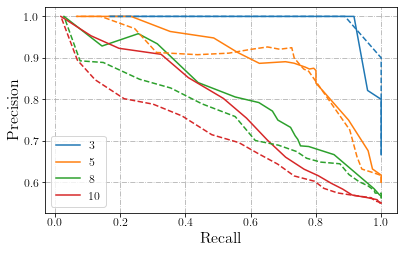

In [224]:
fig = plt.figure(figsize=figsizes.neurips2022(nrows=1, ncols=1)['figure.figsize'])

ax = fig.add_subplot(111)
ax.grid(True, which="both", ls="-.")
ax.set_axisbelow(True)
#
for rec_nl,prec_nl, c in zip(recalls_nl, precisions_nl, COLORS):
    im = ax.plot(rec_nl, prec_nl, c=c)
    # im = ax.scatter(rec_nl, prec_nl, c=c)
for rec_lin,prec_lin, c in zip(recalls_lin,precisions_lin, COLORS):
    im = ax.plot(rec_lin, prec_lin, c=c, ls="--")
    # im = ax.scatter(rec_lin, prec_lin, c=c,marker="^")
    # im = ax.plot(thresholds[0,:], prec_nl, c=c)

ax.set_xlabel("Recall", labelpad=LABELPAD)
ax.set_ylabel("Precision", labelpad=LABELPAD)
plt.legend(DIMS)
ax.tick_params(axis='both', which='major', pad=TICK_PADDING)


plt.savefig("recalls_vs_precisions.svg")

### Monti

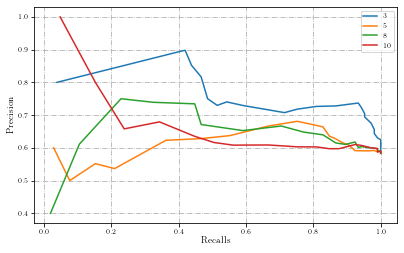

In [94]:
fig = plt.figure(figsize=figsizes.neurips2022(nrows=1, ncols=1)['figure.figsize'])

ax = fig.add_subplot(111)
ax.grid(True, which="both", ls="-.")
ax.set_axisbelow(True)
#
for rec,prec, c in zip(recalls_monti, precisions_monti, COLORS):
    im = ax.plot(rec, prec, c=c)
    # im = ax.scatter(rec_nl, prec_nl, c=c)

ax.set_xlabel("Recalls", labelpad=LABELPAD)
ax.set_ylabel("Precision", labelpad=LABELPAD)
plt.legend(DIMS)
ax.tick_params(axis='both', which='major', pad=TICK_PADDING)


plt.savefig("monti_recalls_vs_precisions.svg")

## Hinton diagram

In [96]:
from notebooks.analysis import perm2matrix, hinton

In [113]:
idx = -1
j_est = torch.from_numpy(est_unmix_jacobians5d_sparse[idx].astype(np.float32))
j_gt = torch.from_numpy(true_unmix_jacobians5d_sparse[idx].astype(np.float32))
j_p= permute_indices5d_sparse[idx]
j_ica = perm2matrix(ica_permute5d_sparse[idx])
j_pm= perm2matrix(j_p)
j_est_corr = j_ica@j_est@j_pm

In [103]:
j_gt[j_gt.abs()<1e-6]=0
j_gt

tensor([[ 0.6245,  0.0000,  0.0000,  0.0000,  0.0000],
        [-0.8148,  0.4783,  0.0000,  0.0000,  0.0000],
        [ 0.0000, -0.7763,  0.8249,  0.0000,  0.0000],
        [-0.2919,  0.0000, -0.4866,  0.6061,  0.0000],
        [ 0.5192,  0.0000,  0.0000, -0.4156,  0.4538]], dtype=torch.float64)

In [115]:
j_est_corr

tensor([[0.6502, 0.0046, 0.0046, 0.0045, 0.0064],
        [0.8523, 0.5019, 0.0076, 0.0076, 0.0072],
        [0.0123, 0.8139, 0.8680, 0.0097, 0.0082],
        [0.3020, 0.0069, 0.5105, 0.6374, 0.0050],
        [1.0000, 0.0082, 0.0091, 0.4306, 0.4713]])

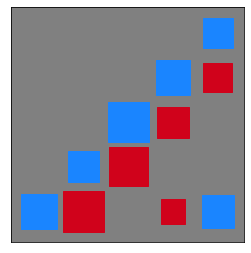

In [123]:
hinton(j_gt, filename="j_gt5d_sparse_hinton")

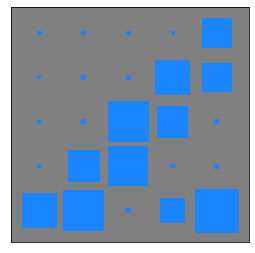

In [122]:
hinton(j_est_corr, filename="j_est_corr_5d_sparse_hinton")